In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data =pd.read_csv("Desktop\Data\Telecom_customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

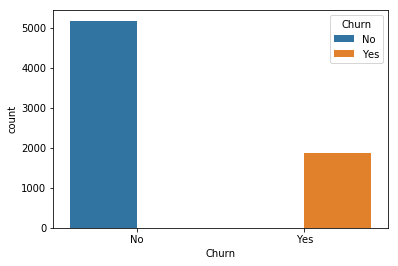

In [5]:
sns.countplot(x='Churn', data=data, hue='Churn')

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.drop(['customerID'], axis=1, inplace=True)

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [11]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [13]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data_1 = pd.get_dummies(data[['InternetService','Contract','PaymentMethod']])
data_1.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0


In [15]:
data.drop(['InternetService','Contract','PaymentMethod'],axis=1, inplace=True)

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes


In [17]:
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    data[col] = [1 if x == "Yes" else 0 for x in data[col]]

In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1


In [19]:
data_f = pd.concat([data, data_1], axis=1)

In [20]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_f['gender'] = le.fit_transform(data_f['gender'])

In [22]:
data_f.corr()['Churn'].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.198324
Contract_One year                         -0.177820
OnlineSecurity                            -0.171226
TechSupport                               -0.164674
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup                              -0.082255
DeviceProtection                          -0.066160
gender                                    -0.008612
PhoneService                               0.011942
MultipleLines                              0.040102
StreamingMovies                            0.061382
StreamingTV 

In [24]:
X = data_f.drop(["Churn"],axis=1)
y = data_f['Churn']

In [25]:
print(y.shape)
print(X.shape)

(7043,)
(7043, 26)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
lr_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.8140525195173882

In [29]:
from sklearn.metrics import accuracy_score, mean_squared_error as mse
print("Mean-squared error using Logistic Regression:", mse(y_test, lr_pred))
print("Accuracy with Logistic Regression:",accuracy_score(y_test, lr_pred))

Mean-squared error using Logistic Regression: 0.18594748048261178
Accuracy with Logistic Regression: 0.8140525195173882


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_pred = rf.predict(X_test)
rfc.score(X_test, y_test)

0.7877927608232789

In [35]:
print("Mean-squared error using Random Forest :", mse(y_test, rfc_pred))
print("Accuracy with Random Forest :",accuracy_score(y_test, rfc_pred))

Mean-squared error using Random Forest : 0.22214336408800567
Accuracy with Random Forest : 0.7778566359119943
